In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Preprocessing 

In [2]:
sd_listings_df = pd.read_csv('sandiego_listings.csv')
sd_listings_df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,20210317194010,2021-03-19,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,https://a0.muscache.com/pictures/d3342744-140a...,8435,https://www.airbnb.com/users/show/8435,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
1,29967,https://www.airbnb.com/rooms/29967,20210317194010,2021-03-19,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,...,10.0,10.0,10.0,NaN,f,5,5,0,0,0.48
2,38245,https://www.airbnb.com/rooms/38245,20210317194010,2021-03-22,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,https://www.airbnb.com/users/show/164137,...,10.0,9.0,9.0,NaN,f,3,0,3,0,1.11
3,62274,https://www.airbnb.com/rooms/62274,20210317194010,2021-03-20,"charming, colorful, close to beach","Modern, cozy, artsy, and european in a lush ga...","We are in walking distance to Starbucks, Trade...",https://a0.muscache.com/pictures/84577734/93ca...,302986,https://www.airbnb.com/users/show/302986,...,10.0,10.0,10.0,NaN,f,2,2,0,0,5.05
4,62949,https://www.airbnb.com/rooms/62949,20210317194010,2021-04-03,Pacific Beach Cozy Private Hideaway Bikes Incl...,Wonderful Cozy Private Retreat. Included are u...,"This is the best part of Pacific Beach, we are...",https://a0.muscache.com/pictures/f5d54435-d02a...,21532,https://www.airbnb.com/users/show/21532,...,10.0,10.0,10.0,NaN,f,2,2,0,0,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9265,48699191,https://www.airbnb.com/rooms/48699191,20210317194010,2021-03-20,"Pool House! Large Families- Air hockey, foosball",Have fun and relax with your family while enjo...,NaN,https://a0.muscache.com/pictures/547dfe25-1e04...,25368470,https://www.airbnb.com/users/show/25368470,...,NaN,NaN,NaN,NaN,f,4,4,0,0,NaN
9266,48701703,https://www.airbnb.com/rooms/48701703,20210317194010,2021-03-22,Beach Haven by 710 Vacation Rentals | Bayfront...,"Light and bright, this beautiful Beach Haven i...",North Mission,https://a0.muscache.com/pictures/7404d1da-64ee...,88168913,https://www.airbnb.com/users/show/88168913,...,NaN,NaN,NaN,NaN,f,166,166,0,0,NaN
9267,48702258,https://www.airbnb.com/rooms/48702258,20210317194010,2021-03-22,Bedroom and Bath near Beaches and Lakes,"14 miles to nearest beach, other beaches near....",This home is in a community surrounded by a go...,https://a0.muscache.com/pictures/60745ef9-1ff8...,392915024,https://www.airbnb.com/users/show/392915024,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
9268,48703115,https://www.airbnb.com/rooms/48703115,20210317194010,2021-03-20,Cozy Condo Room,The condo is in a great location and very cent...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7810506,https://www.airbnb.com/users/show/7810506,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


In [3]:
sandiego_senti_df = pd.read_csv('separated_sentiment.csv')
sandiego_senti_df 

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,comments cleaned,tokens,senti,Sentiment,Subjectivity
0,0,38245,93702,2010-09-09,187475,William,"really great hist and nice place, a good locat...",realli great hist nice place good locat san di...,"['realli', 'great', 'hist', 'nice', 'place', '...","Sentiment(polarity=0.3726190476190476, subject...",0.372619,0.686607
1,1,38245,132608,2010-11-02,269362,John,Melinda is a god person to deal with and very ...,melinda god person deal accommodatingeasi go h...,"['melinda', 'god', 'person', 'deal', 'accommod...","Sentiment(polarity=0.0, subjectivity=0.2)",0.000000,0.200000
2,2,38245,142704,2010-11-22,108540,Suzan,Melinda's house in a beautiful part of San Die...,melinda hous beauti part san diego close airpo...,"['melinda', 'hous', 'beauti', 'part', 'san', '...","Sentiment(polarity=0.2285714285714286, subject...",0.228571,0.295238
3,3,38245,156426,2010-12-20,314129,Sonia,"My stay at Melinda's was great. Such a nice, w...",stay melinda great nice warm person beauti com...,"['stay', 'melinda', 'great', 'nice', 'warm', '...","Sentiment(polarity=0.5393939393939394, subject...",0.539394,0.709091
4,4,38245,169467,2011-01-11,25218,David,Melinda is a very friendly host who is attenti...,melinda friendli host attent guest even invit ...,"['melinda', 'friendli', 'host', 'attent', 'gue...","Sentiment(polarity=0.05, subjectivity=0.25)",0.050000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...
288419,288419,43791368,735972757,2021-03-02,61179908,Chaz,Great place to stay and only about a 5 minute ...,great place stay 5 minut drive airport car ren...,"['great', 'place', 'stay', '5', 'minut', 'driv...","Sentiment(polarity=0.35000000000000003, subjec...",0.350000,0.425000
288420,288420,43791368,736287480,2021-03-04,56385941,Justin,Great spot. Exactly how described. Perfect for...,great spot exactli describ perfect quick trip,"['great', 'spot', 'exactli', 'describ', 'perfe...","Sentiment(polarity=0.7111111111111111, subject...",0.711111,0.750000
288421,288421,43791368,736545734,2021-03-05,152317017,Cameron,The place was in a good location right downtow...,place good locat right downtown view bay one t...,"['place', 'good', 'locat', 'right', 'downtown'...","Sentiment(polarity=0.43605442176870746, subjec...",0.436054,0.508673
288422,288422,43791368,739226692,2021-03-14,182841943,Gulya,A nice place to stay!,nice place stay,"['nice', 'place', 'stay']","Sentiment(polarity=0.6, subjectivity=1.0)",0.600000,1.000000


In [4]:
# Scale 
scaler = MinMaxScaler()

sandiego_senti_df['Sentiment'] = scaler.fit_transform(sandiego_senti_df [['Sentiment']])

In [5]:
# drop column id 
clean_sandiego_senti_df = sandiego_senti_df.drop(columns=['id'])
# clean_sandiego_senti_df

In [6]:
join_df = sd_listings_df.join(clean_sandiego_senti_df.set_index('listing_id'), on='id')
join_df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,Unnamed: 0,date,reviewer_id,reviewer_name,comments,comments cleaned,tokens,senti,Sentiment,Subjectivity
0,5570,https://www.airbnb.com/rooms/5570,20210317194010,2021-03-19,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,https://a0.muscache.com/pictures/d3342744-140a...,8435,https://www.airbnb.com/users/show/8435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29967,https://www.airbnb.com/rooms/29967,20210317194010,2021-03-19,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38245,https://www.airbnb.com/rooms/38245,20210317194010,2021-03-22,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,https://www.airbnb.com/users/show/164137,...,0.0,2010-09-09,187475.0,William,"really great hist and nice place, a good locat...",realli great hist nice place good locat san di...,"['realli', 'great', 'hist', 'nice', 'place', '...","Sentiment(polarity=0.3726190476190476, subject...",0.686310,0.686607
2,38245,https://www.airbnb.com/rooms/38245,20210317194010,2021-03-22,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,https://www.airbnb.com/users/show/164137,...,1.0,2010-11-02,269362.0,John,Melinda is a god person to deal with and very ...,melinda god person deal accommodatingeasi go h...,"['melinda', 'god', 'person', 'deal', 'accommod...","Sentiment(polarity=0.0, subjectivity=0.2)",0.500000,0.200000
2,38245,https://www.airbnb.com/rooms/38245,20210317194010,2021-03-22,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,https://www.airbnb.com/users/show/164137,...,2.0,2010-11-22,108540.0,Suzan,Melinda's house in a beautiful part of San Die...,melinda hous beauti part san diego close airpo...,"['melinda', 'hous', 'beauti', 'part', 'san', '...","Sentiment(polarity=0.2285714285714286, subject...",0.614286,0.295238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9265,48699191,https://www.airbnb.com/rooms/48699191,20210317194010,2021-03-20,"Pool House! Large Families- Air hockey, foosball",Have fun and relax with your family while enjo...,NaN,https://a0.muscache.com/pictures/547dfe25-1e04...,25368470,https://www.airbnb.com/users/show/25368470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9266,48701703,https://www.airbnb.com/rooms/48701703,20210317194010,2021-03-22,Beach Haven by 710 Vacation Rentals | Bayfront...,"Light and bright, this beautiful Beach Haven i...",North Mission,https://a0.muscache.com/pictures/7404d1da-64ee...,88168913,https://www.airbnb.com/users/show/88168913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9267,48702258,https://www.airbnb.com/rooms/48702258,20210317194010,2021-03-22,Bedroom and Bath near Beaches and Lakes,"14 miles to nearest beach, other beaches near....",This home is in a community surrounded by a go...,https://a0.muscache.com/pictures/60745ef9-1ff8...,392915024,https://www.airbnb.com/users/show/392915024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9268,48703115,https://www.airbnb.com/rooms/48703115,20210317194010,2021-03-20,Cozy Condo Room,The condo is in a great location and very cent...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7810506,https://www.airbnb.com/users/show/7810506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
join_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [8]:
new_df = join_df[['id','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                  'review_scores_communication','review_scores_location','review_scores_value','latitude','longitude']]
new_df 

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude
0,5570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.78430,-117.25258
1,29967,98.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80724,-117.25630
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870
...,...,...,...,...,...,...,...,...,...,...
9265,48699191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.60464,-117.03533
9266,48701703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.78679,-117.25282
9267,48702258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.64641,-116.96242
9268,48703115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.80578,-117.12911


In [9]:
drop_df = new_df.dropna()
drop_df 

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude
1,29967,98.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80724,-117.25630
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870
...,...,...,...,...,...,...,...,...,...,...
9184,48525308,100.0,10.0,8.0,10.0,10.0,8.0,10.0,32.77042,-117.16711
9188,48528974,100.0,10.0,10.0,10.0,10.0,10.0,10.0,32.62424,-116.97472
9192,48547478,80.0,10.0,8.0,8.0,8.0,10.0,10.0,32.75789,-117.11602
9195,48553239,100.0,10.0,10.0,10.0,10.0,10.0,10.0,32.78344,-117.25225


In [10]:
duplicates_df = drop_df.drop_duplicates()
duplicates_df.head(10)

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude
1,29967,98.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80724,-117.25630
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870
3,62274,96.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80734,-117.24243
4,62949,97.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80885,-117.23043
5,67441,100.0,10.0,10.0,10.0,10.0,10.0,10.0,32.76365,-117.07675
6,75668,97.0,10.0,9.0,10.0,10.0,10.0,10.0,32.74730,-117.14423
7,77785,95.0,10.0,10.0,10.0,10.0,10.0,10.0,32.74810,-117.19165
8,79300,96.0,10.0,9.0,10.0,10.0,10.0,10.0,32.74594,-117.14406
9,103417,98.0,10.0,10.0,10.0,10.0,10.0,10.0,32.81321,-117.26853
10,103720,99.0,10.0,10.0,10.0,10.0,10.0,10.0,32.74779,-117.16480


In [11]:
reset_df = duplicates_df.reset_index()
reset_df.head(115)

,index,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude
0,1,29967,98.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80724,-117.25630
1,2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870
2,3,62274,96.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80734,-117.24243
3,4,62949,97.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80885,-117.23043
4,5,67441,100.0,10.0,10.0,10.0,10.0,10.0,10.0,32.76365,-117.07675
...,...,...,...,...,...,...,...,...,...,...,...
110,111,657126,98.0,10.0,10.0,10.0,10.0,10.0,9.0,32.84588,-117.27058
111,112,670830,92.0,10.0,9.0,10.0,10.0,10.0,9.0,32.72704,-117.16424
112,114,678569,98.0,10.0,10.0,10.0,10.0,10.0,10.0,32.84543,-117.26990
113,115,691132,89.0,9.0,9.0,10.0,9.0,10.0,9.0,32.80887,-117.25906


In [12]:
clean_df = reset_df.drop(columns=['index'])
clean_df.head(114)

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude
0,29967,98.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80724,-117.25630
1,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870
2,62274,96.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80734,-117.24243
3,62949,97.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80885,-117.23043
4,67441,100.0,10.0,10.0,10.0,10.0,10.0,10.0,32.76365,-117.07675
...,...,...,...,...,...,...,...,...,...,...
109,657051,96.0,10.0,10.0,10.0,10.0,10.0,10.0,32.72266,-117.12402
110,657126,98.0,10.0,10.0,10.0,10.0,10.0,9.0,32.84588,-117.27058
111,670830,92.0,10.0,9.0,10.0,10.0,10.0,9.0,32.72704,-117.16424
112,678569,98.0,10.0,10.0,10.0,10.0,10.0,10.0,32.84543,-117.26990


In [13]:
clean_df.dtypes

id                               int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
latitude                       float64
longitude                      float64
dtype: object

#### Averages

In [14]:
mean_df = sandiego_senti_df.groupby(['listing_id']).mean()
mean_df 

,Unnamed: 0,id,reviewer_id,Sentiment,Subjectivity
listing_id,,,,,
38245,71.0,9.332990e+07,3.155978e+07,0.679934,0.535697
62274,458.5,2.125843e+08,5.305670e+07,0.705233,0.573905
62949,1150.0,2.780960e+08,8.390608e+07,0.729544,0.615687
75668,1623.0,1.358540e+08,4.811615e+07,0.704104,0.579592
79300,1799.0,8.452657e+07,3.080475e+07,0.705926,0.577792
...,...,...,...,...,...
42143732,287961.0,6.750451e+08,1.417634e+08,0.698907,0.592205
42608887,288066.0,6.696722e+08,1.919387e+08,0.692524,0.605529
42627855,288168.5,6.746798e+08,1.857774e+08,0.692687,0.611147


In [15]:
# creating list_id as a column
mean_df['senti_mean_id'] = mean_df.index

In [16]:
senti_avg_df = mean_df[['senti_mean_id','Sentiment','Subjectivity']]
senti_avg_df

,senti_mean_id,Sentiment,Subjectivity
listing_id,,,
38245,38245,0.679934,0.535697
62274,62274,0.705233,0.573905
62949,62949,0.729544,0.615687
75668,75668,0.704104,0.579592
79300,79300,0.705926,0.577792
...,...,...,...
42143732,42143732,0.698907,0.592205
42608887,42608887,0.692524,0.605529
42627855,42627855,0.692687,0.611147


In [17]:
# join_df = sd_listings_df.join(clean_sandiego_senti_df.set_index('listing_id'), on='id')

join_mean_df = clean_df.join(senti_avg_df.set_index('senti_mean_id'), on='id')
join_mean_df

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude,Sentiment,Subjectivity
0,29967,98.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80724,-117.25630,NaN,NaN
1,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870,0.679934,0.535697
2,62274,96.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80734,-117.24243,0.705233,0.573905
3,62949,97.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80885,-117.23043,0.729544,0.615687
4,67441,100.0,10.0,10.0,10.0,10.0,10.0,10.0,32.76365,-117.07675,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7745,48525308,100.0,10.0,8.0,10.0,10.0,8.0,10.0,32.77042,-117.16711,NaN,NaN
7746,48528974,100.0,10.0,10.0,10.0,10.0,10.0,10.0,32.62424,-116.97472,NaN,NaN
7747,48547478,80.0,10.0,8.0,8.0,8.0,10.0,10.0,32.75789,-117.11602,NaN,NaN
7748,48553239,100.0,10.0,10.0,10.0,10.0,10.0,10.0,32.78344,-117.25225,NaN,NaN


In [18]:
sandiego_df = join_mean_df.dropna()
sandiego_df

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude,Sentiment,Subjectivity
1,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870,0.679934,0.535697
2,62274,96.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80734,-117.24243,0.705233,0.573905
3,62949,97.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80885,-117.23043,0.729544,0.615687
5,75668,97.0,10.0,9.0,10.0,10.0,10.0,10.0,32.74730,-117.14423,0.704104,0.579592
7,79300,96.0,10.0,9.0,10.0,10.0,10.0,10.0,32.74594,-117.14406,0.705926,0.577792
...,...,...,...,...,...,...,...,...,...,...,...,...
6185,42143732,100.0,10.0,10.0,10.0,10.0,10.0,10.0,32.72820,-117.16429,0.698907,0.592205
6293,42608887,87.0,8.0,8.0,9.0,9.0,9.0,8.0,32.75358,-117.24758,0.692524,0.605529
6296,42627855,87.0,9.0,9.0,10.0,9.0,9.0,8.0,32.75304,-117.24761,0.692687,0.611147
6308,42689144,93.0,10.0,9.0,10.0,10.0,10.0,9.0,32.77909,-117.25198,0.712566,0.612388


In [19]:
sandiego_df = sandiego_df.loc[sandiego_df['Subjectivity'] > .50]

In [20]:
# checking above if averages are correct 
# senti_avg_df

### Polarity/Review Rating Scatter + Linear Regression 

Text(0, 0.5, 'Review Rating')

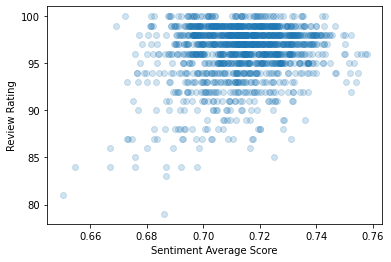

In [21]:
import matplotlib.pyplot as plt 

plt.scatter(sandiego_df['Sentiment'], sandiego_df['review_scores_rating'], alpha = 0.2)
plt.xlabel('Sentiment Average Score')
plt.ylabel('Review Rating')

In [22]:
# reshape 
X = sandiego_df['Sentiment'].values.reshape(-1,1)
y = sandiego_df['review_scores_rating'].values.reshape(-1,1)

print("Shape:",X.shape, y.shape)

Shape: (1436, 1) (1436, 1)


In [23]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [24]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model.score(X, y) # whole data

0.03691235134959647

In [27]:
from sklearn.metrics import mean_squared_error, r2_score 

predict = model.predict(X_test)

mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)

print(f'Mean Squared Error (MSE): {mse}')
print (f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 8.68083351017758
R-squared (R2): 0.03645064185965863


BAD R2 SCORE.. Hard to predict 

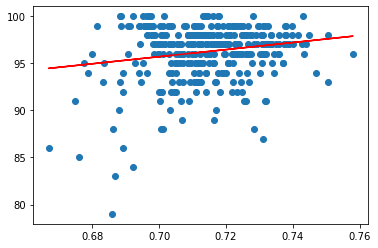

In [28]:
plt.scatter(X_test, y_test)
plt.plot(X_test, predict, color='red')

In [29]:
# Model A Bit Off
# Checking Predicted Scores
print(f"True output: {y[0]}")
print(f"Predicted output: {predict[0]}")
print(f"Prediction Error: {predict[0]-y[0]}")

True output: [86.]
Predicted output: [96.05275867]
Prediction Error: [10.05275867]


In [30]:
print(f"True output: {y[1]}")
print(f"Predicted output: {predict[1]}")
print(f"Prediction Error: {predict[1]-y[1]}")

True output: [96.]
Predicted output: [96.8706125]
Prediction Error: [0.8706125]


In [31]:
print(f"True output: {y[2]}")
print(f"Predicted output: {predict[2]}")
print(f"Prediction Error: {predict[2]-y[2]}")

True output: [97.]
Predicted output: [95.92905885]
Prediction Error: [-1.07094115]


### Subjectivity/Review Rating Scatter + Linear Regression 

Text(0, 0.5, 'Review Rating')

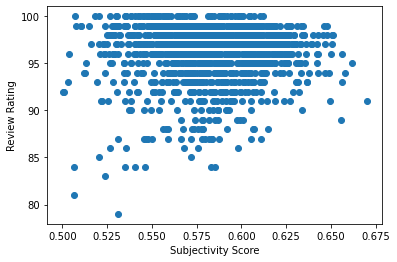

In [32]:
plt.scatter(sandiego_df['Subjectivity'], sandiego_df['review_scores_rating'])
plt.xlabel('Subjectivity Score')
plt.ylabel('Review Rating')

In [33]:
X_sub = sandiego_df['Subjectivity'].values.reshape(-1,1)

print("Shape:", X_sub.shape, y.shape)

Shape: (1436, 1) (1436, 1)


In [34]:
model.score(X_sub, y)

-2.749681339504257

In [35]:
X_train_sub, X_test_sub, y_train_rev, y_test_rev = train_test_split(X_sub,y, random_state = 42)

In [36]:
submodel = LinearRegression()

In [37]:
submodel.fit(X_train_sub, y_train_rev)

LinearRegression()

In [38]:
subpredict = submodel.predict(X_test_sub)

sub_mse = mean_squared_error(y_test_rev, subpredict)
sub_r2 = r2_score(y_test_rev, subpredict)

print(f'Mean Squared Error (MSE): {sub_mse}')
print (f'R-squared (R2): {sub_r2}')

Mean Squared Error (MSE): 8.996886228874246
R-squared (R2): 0.0013696333503212532


Text(0, 0.5, 'Review Rating')

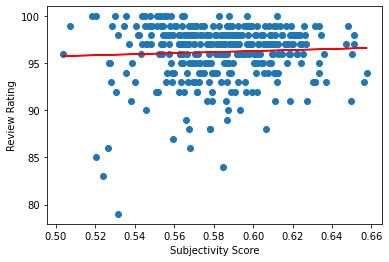

In [39]:
plt.scatter(X_test_sub, y_test_rev)
plt.plot(X_test_sub, subpredict, color='red')
plt.xlabel('Subjectivity Score')
plt.ylabel('Review Rating')

### Polarity/Subjectivity Scatter Plot + Linear Regression

Text(0, 0.5, 'Subjectivity Score')

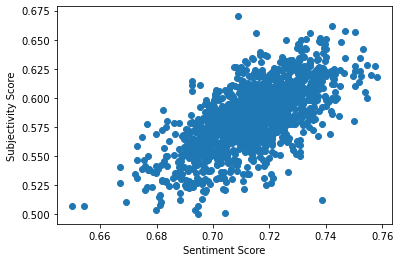

In [40]:
plt.scatter(sandiego_df['Sentiment'], sandiego_df['Subjectivity'])
plt.xlabel('Sentiment Score')
plt.ylabel('Subjectivity Score')

In [41]:
y_sub = sandiego_df['Subjectivity'].values.reshape(-1,1)

print("Shape:", X.shape, y_sub.shape)

Shape: (1436, 1) (1436, 1)


In [42]:
X_train_senti, X_test_senti, y_train_sub, y_test_sub = train_test_split(X, y_sub, random_state = 42)

In [43]:
sentimodel = LinearRegression()

In [44]:
sentimodel.fit(X_train_senti, y_train_sub)

LinearRegression()

In [45]:
sentimodel.score(X, y_sub)

0.44577868929232145

In [46]:
senti_predict = sentimodel.predict(X_test_senti)

senti_mse = mean_squared_error(y_test_sub, senti_predict)
senti_r2 = r2_score(y_test_sub, senti_predict)

print(f'Mean Squared Error (MSE): {senti_mse}')
print (f'R-squared (R2): {senti_r2}')

Mean Squared Error (MSE): 0.0004430438545766574
R-squared (R2): 0.43880059805767746


Text(0, 0.5, 'Subjectivity Score')

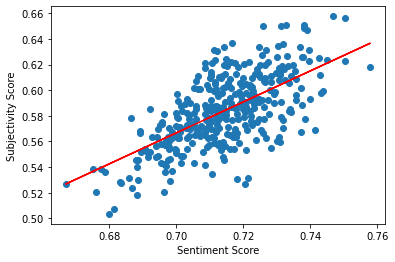

In [47]:
plt.scatter(X_test_senti, y_test_sub)
plt.plot(X_test_senti, senti_predict, color='red')
plt.xlabel('Sentiment Score')
plt.ylabel('Subjectivity Score')

As reviews become more opinionated, reviews tend to be more positive. Vice versa.

# Repetitive Positive/Negative Phrases

In [48]:
comments_df = pd.read_csv('separated_sentiment.csv')
comments_df 

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,comments cleaned,tokens,senti,Sentiment,Subjectivity
0,0,38245,93702,2010-09-09,187475,William,"really great hist and nice place, a good locat...",realli great hist nice place good locat san di...,"['realli', 'great', 'hist', 'nice', 'place', '...","Sentiment(polarity=0.3726190476190476, subject...",0.372619,0.686607
1,1,38245,132608,2010-11-02,269362,John,Melinda is a god person to deal with and very ...,melinda god person deal accommodatingeasi go h...,"['melinda', 'god', 'person', 'deal', 'accommod...","Sentiment(polarity=0.0, subjectivity=0.2)",0.000000,0.200000
2,2,38245,142704,2010-11-22,108540,Suzan,Melinda's house in a beautiful part of San Die...,melinda hous beauti part san diego close airpo...,"['melinda', 'hous', 'beauti', 'part', 'san', '...","Sentiment(polarity=0.2285714285714286, subject...",0.228571,0.295238
3,3,38245,156426,2010-12-20,314129,Sonia,"My stay at Melinda's was great. Such a nice, w...",stay melinda great nice warm person beauti com...,"['stay', 'melinda', 'great', 'nice', 'warm', '...","Sentiment(polarity=0.5393939393939394, subject...",0.539394,0.709091
4,4,38245,169467,2011-01-11,25218,David,Melinda is a very friendly host who is attenti...,melinda friendli host attent guest even invit ...,"['melinda', 'friendli', 'host', 'attent', 'gue...","Sentiment(polarity=0.05, subjectivity=0.25)",0.050000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...
288419,288419,43791368,735972757,2021-03-02,61179908,Chaz,Great place to stay and only about a 5 minute ...,great place stay 5 minut drive airport car ren...,"['great', 'place', 'stay', '5', 'minut', 'driv...","Sentiment(polarity=0.35000000000000003, subjec...",0.350000,0.425000
288420,288420,43791368,736287480,2021-03-04,56385941,Justin,Great spot. Exactly how described. Perfect for...,great spot exactli describ perfect quick trip,"['great', 'spot', 'exactli', 'describ', 'perfe...","Sentiment(polarity=0.7111111111111111, subject...",0.711111,0.750000
288421,288421,43791368,736545734,2021-03-05,152317017,Cameron,The place was in a good location right downtow...,place good locat right downtown view bay one t...,"['place', 'good', 'locat', 'right', 'downtown'...","Sentiment(polarity=0.43605442176870746, subjec...",0.436054,0.508673
288422,288422,43791368,739226692,2021-03-14,182841943,Gulya,A nice place to stay!,nice place stay,"['nice', 'place', 'stay']","Sentiment(polarity=0.6, subjectivity=1.0)",0.600000,1.000000


In [49]:
postive_df = comments_df.loc[comments_df['Sentiment'] >= 0]

In [50]:
postive_clean_comments_df = postive_df[postive_df['comments cleaned'].notna()]

In [51]:
pd.Series(' '.join(postive_clean_comments_df['comments cleaned']).split()).value_counts()[:50]

great           183972
place           177676
stay            174196
locat           121207
clean            84902
beach            71629
would            70104
host             66324
everyth          61241
nice             60245
recommend        56614
love             55223
perfect          54623
san              52834
hous             52689
diego            52609
walk             51655
need             51506
comfort          49697
park             48155
definit          47393
close            45938
us               45041
home             42627
space            41513
time             39932
easi             38272
realli           35914
room             35315
littl            34537
area             32799
restaur          32636
enjoy            32526
well             32196
super            31645
amaz             31463
bed              30637
beauti           30323
back             29844
also             28171
good             27773
thank            26780
get              26432
neighborhoo

In [52]:
negative_df = comments_df.loc[comments_df['Sentiment'] < 0]

In [53]:
negative_clean_comments_df = negative_df[negative_df['comments cleaned'].notna()]

In [54]:
pd.Series(' '.join(negative_clean_comments_df['comments cleaned']).split()).value_counts()[:50]

stay         1955
place        1943
locat        1046
would         932
park          913
host          847
small         730
hous          721
beach         711
room          688
us            684
san           653
diego         647
need          633
recommend     623
time          600
walk          599
home          594
comfort       592
everyth       590
night         573
get           542
close         525
bad           520
bed           508
definit       497
space         492
airbnb        491
like          461
even          441
amaz          434
back          429
one           428
check         424
realli        422
also          420
littl         411
area          398
go            395
easi          385
beauti        380
day           376
well          365
could         360
clean         358
use           347
wonder        343
didnt         322
find          313
minut         307
dtype: int64

In [60]:
drop_df['id'].value_counts()

589214      781
62949       751
2111974     710
470520      701
6706547     680
           ... 
23652286      1
34420740      1
13994002      1
13574215      1
11589659      1
Name: id, Length: 7750, dtype: int64

In [61]:
find_most_dup = drop_df.join(senti_avg_df.set_index('senti_mean_id'), on='id')
find_most_dup 

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude,Sentiment,Subjectivity
1,29967,98.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80724,-117.25630,NaN,NaN
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870,0.679934,0.535697
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870,0.679934,0.535697
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870,0.679934,0.535697
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870,0.679934,0.535697
...,...,...,...,...,...,...,...,...,...,...,...,...
9184,48525308,100.0,10.0,8.0,10.0,10.0,8.0,10.0,32.77042,-117.16711,NaN,NaN
9188,48528974,100.0,10.0,10.0,10.0,10.0,10.0,10.0,32.62424,-116.97472,NaN,NaN
9192,48547478,80.0,10.0,8.0,8.0,8.0,10.0,10.0,32.75789,-117.11602,NaN,NaN
9195,48553239,100.0,10.0,10.0,10.0,10.0,10.0,10.0,32.78344,-117.25225,NaN,NaN


In [62]:
no_nan_dup = find_most_dup[find_most_dup['Sentiment'].notna()]
no_nan_dup 

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude,Sentiment,Subjectivity
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870,0.679934,0.535697
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870,0.679934,0.535697
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870,0.679934,0.535697
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870,0.679934,0.535697
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870,0.679934,0.535697
...,...,...,...,...,...,...,...,...,...,...,...,...
7447,43791368,94.0,9.0,10.0,10.0,10.0,10.0,9.0,32.72814,-117.16591,0.746884,0.657676
7447,43791368,94.0,9.0,10.0,10.0,10.0,10.0,9.0,32.72814,-117.16591,0.746884,0.657676
7447,43791368,94.0,9.0,10.0,10.0,10.0,10.0,9.0,32.72814,-117.16591,0.746884,0.657676
7447,43791368,94.0,9.0,10.0,10.0,10.0,10.0,9.0,32.72814,-117.16591,0.746884,0.657676


In [64]:
no_nan_dup['id'].value_counts()

589214      781
62949       751
2111974     710
470520      701
6706547     680
           ... 
34999659    101
5335425     101
25516902    101
31336123    101
42608887    101
Name: id, Length: 1444, dtype: int64

## Location 1 

In [67]:
location_1 = comments_df.loc[comments_df['listing_id'] == 589214]
location_1

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,comments cleaned,tokens,senti,Sentiment,Subjectivity
13281,13281,589214,2332974,2012-09-18,2750210,Andrew,"Michael was a wonderful host, with a great set...",michael wonder host great setup hous sweet par...,"['michael', 'wonder', 'host', 'great', 'setup'...","Sentiment(polarity=0.5386363636363636, subject...",0.538636,0.646717
13282,13282,589214,2524491,2012-10-06,534720,Yuhsiu,Michael is wonderful host. The rooms are clean...,michael wonder host room clean friendli explai...,"['michael', 'wonder', 'host', 'room', 'clean',...","Sentiment(polarity=0.2722222222222222, subject...",0.272222,0.566667
13283,13283,589214,2779563,2012-11-01,3720290,Brian,My girlfriend and I stayed at Michael's house ...,girlfriend stay michael hous 4 day couldnt hap...,"['girlfriend', 'stay', 'michael', 'hous', '4',...","Sentiment(polarity=0.27083333333333337, subjec...",0.270833,0.475000
13284,13284,589214,2789785,2012-11-02,1931210,Rachel & Jordan,This was a nice house with an awesome location...,nice hous awesom locat room look great quaint ...,"['nice', 'hous', 'awesom', 'locat', 'room', 'l...","Sentiment(polarity=0.36517857142857146, subjec...",0.365179,0.648214
13285,13285,589214,2859553,2012-11-11,2200601,Wenny,We had a great stay at Michael's place. He was...,great stay michael place welcom place amaz hou...,"['great', 'stay', 'michael', 'place', 'welcom'...","Sentiment(polarity=0.8, subjectivity=0.75)",0.800000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
14057,14057,589214,730865551,2021-02-13,90044432,Carrie,The treehouse made my trip so special. The pla...,treehous made trip special plant surround loca...,"['treehous', 'made', 'trip', 'special', 'plant...","Sentiment(polarity=0.5523809523809524, subject...",0.552381,0.557143
14058,14058,589214,732042334,2021-02-16,208330438,Janet,"Super natural feel, earthy, and comfortable. O...",super natur feel earthi comfort overal great p...,"['super', 'natur', 'feel', 'earthi', 'comfort'...","Sentiment(polarity=0.5666666666666667, subject...",0.566667,0.708333
14059,14059,589214,733946118,2021-02-23,158651444,Jeffrey,Super stylish and great location. Michael was ...,super stylish great locat michael good commun ...,"['super', 'stylish', 'great', 'locat', 'michae...","Sentiment(polarity=0.5833333333333333, subject...",0.583333,0.754167
14060,14060,589214,735541931,2021-02-28,124174147,Anthony,"beautiful house 10 minutes from the beach, gre...",beauti hous 10 minut beach great get away home...,"['beauti', 'hous', '10', 'minut', 'beach', 'gr...","Sentiment(polarity=0.8, subjectivity=0.75)",0.800000,0.750000


In [68]:
loc1_postive_df = location_1.loc[location_1['Sentiment'] >= 0]
loc1_postive_df

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,comments cleaned,tokens,senti,Sentiment,Subjectivity
13281,13281,589214,2332974,2012-09-18,2750210,Andrew,"Michael was a wonderful host, with a great set...",michael wonder host great setup hous sweet par...,"['michael', 'wonder', 'host', 'great', 'setup'...","Sentiment(polarity=0.5386363636363636, subject...",0.538636,0.646717
13282,13282,589214,2524491,2012-10-06,534720,Yuhsiu,Michael is wonderful host. The rooms are clean...,michael wonder host room clean friendli explai...,"['michael', 'wonder', 'host', 'room', 'clean',...","Sentiment(polarity=0.2722222222222222, subject...",0.272222,0.566667
13283,13283,589214,2779563,2012-11-01,3720290,Brian,My girlfriend and I stayed at Michael's house ...,girlfriend stay michael hous 4 day couldnt hap...,"['girlfriend', 'stay', 'michael', 'hous', '4',...","Sentiment(polarity=0.27083333333333337, subjec...",0.270833,0.475000
13284,13284,589214,2789785,2012-11-02,1931210,Rachel & Jordan,This was a nice house with an awesome location...,nice hous awesom locat room look great quaint ...,"['nice', 'hous', 'awesom', 'locat', 'room', 'l...","Sentiment(polarity=0.36517857142857146, subjec...",0.365179,0.648214
13285,13285,589214,2859553,2012-11-11,2200601,Wenny,We had a great stay at Michael's place. He was...,great stay michael place welcom place amaz hou...,"['great', 'stay', 'michael', 'place', 'welcom'...","Sentiment(polarity=0.8, subjectivity=0.75)",0.800000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
14057,14057,589214,730865551,2021-02-13,90044432,Carrie,The treehouse made my trip so special. The pla...,treehous made trip special plant surround loca...,"['treehous', 'made', 'trip', 'special', 'plant...","Sentiment(polarity=0.5523809523809524, subject...",0.552381,0.557143
14058,14058,589214,732042334,2021-02-16,208330438,Janet,"Super natural feel, earthy, and comfortable. O...",super natur feel earthi comfort overal great p...,"['super', 'natur', 'feel', 'earthi', 'comfort'...","Sentiment(polarity=0.5666666666666667, subject...",0.566667,0.708333
14059,14059,589214,733946118,2021-02-23,158651444,Jeffrey,Super stylish and great location. Michael was ...,super stylish great locat michael good commun ...,"['super', 'stylish', 'great', 'locat', 'michae...","Sentiment(polarity=0.5833333333333333, subject...",0.583333,0.754167
14060,14060,589214,735541931,2021-02-28,124174147,Anthony,"beautiful house 10 minutes from the beach, gre...",beauti hous 10 minut beach great get away home...,"['beauti', 'hous', '10', 'minut', 'beach', 'gr...","Sentiment(polarity=0.8, subjectivity=0.75)",0.800000,0.750000


In [69]:
loc1_clean_comments_df = loc1_postive_df[loc1_postive_df['comments cleaned'].notna()]

In [70]:
pd.Series(' '.join(loc1_clean_comments_df['comments cleaned']).split()).value_counts()[:50]

stay         604
great        425
hous         389
place        377
treehous     364
room         271
shower       269
michael      265
love         250
locat        233
littl        230
would        209
experi       183
tree         178
san          175
diego        173
outdoor      170
walk         160
space        159
definit      157
uniqu        153
realli       152
nice         140
beauti       134
night        132
time         131
us           130
amaz         130
recommend    125
close        124
area         122
plane        120
like         117
itali        115
get          111
host         110
bed          105
everyth      102
fun          102
enjoy         98
cool          97
comfort       96
one           94
perfect       93
small         89
even          87
didnt         87
cozi          86
view          85
easi          84
dtype: int64

In [75]:
loc1_negative_df = location_1.loc[location_1['Sentiment'] < 0]
loc1neg_clean_comments_df = loc1_negative_df[loc1_negative_df['comments cleaned'].notna()]
pd.Series(' '.join(loc1neg_clean_comments_df['comments cleaned']).split()).value_counts()[:50]

treehous    10
experi       8
og           8
stay         7
room         6
tree         6
host         6
bad          5
vi           5
til          5
even         5
amaz         5
shower       4
kitchen      4
sleep        4
space        4
fli          4
end          4
plane        4
littl        4
er           4
lot          4
check        4
nois         4
book         3
hous         3
night        3
back         3
close        3
outdoor      3
refund       3
your         3
loud         3
total        3
uniqu        3
realli       3
text         3
airport      3
bed          3
want         3
get          3
everyth      3
also         3
small        3
common       3
call         3
der          3
raccoon      3
itali        3
airbnb       2
dtype: int64

## Location 2 

In [71]:
location_2 = comments_df.loc[comments_df['listing_id'] == 62949]
loc2_postive_df = location_2.loc[location_2['Sentiment'] >= 0]
loc2_clean_comments_df = loc2_postive_df[loc2_postive_df['comments cleaned'].notna()]
pd.Series(' '.join(loc2_clean_comments_df['comments cleaned']).split()).value_counts()[:50]

lisa         603
place        537
stay         513
great        489
beach        393
bike         277
locat        270
everyth      216
perfect      212
would        207
san          194
diego        191
need         185
recommend    180
clean        158
room         157
love         155
nice         153
cozi         139
space        136
easi         136
definit      134
littl        127
close        125
time         117
comfort      113
thank        109
us           109
get          106
host         105
pacif         95
cute          91
use           90
realli        88
area          86
check         85
park          82
small         82
enjoy         80
well          80
like          80
also          75
back          73
made          73
super         72
provid        69
privat        67
quiet         66
coffe         66
day           64
dtype: int64

In [72]:
loc2_negative_df = location_2.loc[location_2['Sentiment'] < 0]
loc2neg_clean_comments_df = loc2_negative_df[loc2_negative_df['comments cleaned'].notna()]
pd.Series(' '.join(loc2neg_clean_comments_df['comments cleaned']).split()).value_counts()[:50]

lisa         11
stay          7
place         6
recommend     4
bike          4
small         4
everyth       4
beach         4
arriv         3
issu          3
need          3
made          3
thank         3
area          3
close         3
locat         3
time          3
room          3
much          3
without       2
longer        2
wonder        2
san           2
feel          2
like          2
check         2
avail         2
conveni       2
never         2
possibl       2
come          2
well          2
go            2
back          2
amaz          2
short         2
diego         2
realli        2
could         2
lot           2
action        2
definit       2
quiet         1
anyth         1
boyfriend     1
privaci       1
smoothli      1
see           1
second        1
anyon         1
dtype: int64

## Location 3

In [73]:
location_3 = comments_df.loc[comments_df['listing_id'] == 2111974]
loc3_postive_df = location_3.loc[location_3['Sentiment'] >= 0]
loc3_clean_comments_df = loc3_postive_df[loc3_postive_df['comments cleaned'].notna()]
pd.Series(' '.join(loc3_clean_comments_df['comments cleaned']).split()).value_counts()[:50]

stay            558
great           501
kyle            499
paig            410
place           401
love            283
park            264
locat           260
space           235
hous            207
host            202
recommend       196
north           184
cottag          183
would           179
walk            174
perfect         172
us              170
everyth         169
diego           164
san             164
restaur         157
need            156
time            153
comfort         145
area            143
super           141
definit         133
neighborhood    132
back            127
cozi            124
littl           123
granada         121
chicken         120
realli          105
enjoy           104
nice            103
friendli        102
clean           101
welcom          101
night            98
thank            97
bed              95
even             94
amaz             94
bar              92
close            92
shop             92
wonder           91
home             89


In [74]:
loc3_negative_df = location_3.loc[location_3['Sentiment'] < 0]
loc3neg_clean_comments_df = loc3_negative_df[loc3_negative_df['comments cleaned'].notna()]
pd.Series(' '.join(loc3neg_clean_comments_df['comments cleaned']).split()).value_counts()[:50]

kyle         14
paig         14
stay         11
chicken      10
place         7
cottag        7
back          6
hous          6
park          5
urban         5
home          5
definit       5
restaur       5
granada       4
locat         4
space         4
guest         4
host          4
accommod      4
love          4
amen          4
mani          3
recommend     3
dog           3
need          3
diego         3
come          3
friendli      3
thank         3
record        3
long          3
listen        3
wonder        3
patio         3
lot           3
san           3
would         3
farm          3
backyard      3
realli        3
find          2
citi          2
proxim        2
cant          2
two           2
peopl         2
cozi          2
bar           2
shop          2
cat           2
dtype: int64

# DataFrame To CSV

In [55]:
sandiego_df.to_csv('sentiment_avg.csv', encoding='utf-8')

### Scratch Work

In [56]:
new_df

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude
0,5570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.78430,-117.25258
1,29967,98.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80724,-117.25630
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870
...,...,...,...,...,...,...,...,...,...,...
9265,48699191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.60464,-117.03533
9266,48701703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.78679,-117.25282
9267,48702258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.64641,-116.96242
9268,48703115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.80578,-117.12911


In [57]:
join_mean_df5 = new_df.join(senti_avg_df.set_index('senti_mean_id'), on='id')
join_mean_df5

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude,Sentiment,Subjectivity
0,5570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.78430,-117.25258,NaN,NaN
1,29967,98.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80724,-117.25630,NaN,NaN
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870,0.679934,0.535697
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870,0.679934,0.535697
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870,0.679934,0.535697
...,...,...,...,...,...,...,...,...,...,...,...,...
9265,48699191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.60464,-117.03533,NaN,NaN
9266,48701703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.78679,-117.25282,NaN,NaN
9267,48702258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.64641,-116.96242,NaN,NaN
9268,48703115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.80578,-117.12911,NaN,NaN


In [58]:
sandiego_df1 = join_mean_df5[join_mean_df5['Sentiment'].notna()]
sandiego_df1 = sandiego_df1.drop_duplicates()
sandiego_df1

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude,Sentiment,Subjectivity
2,38245,86.0,9.0,9.0,10.0,10.0,9.0,9.0,32.74202,-117.21870,0.679934,0.535697
3,62274,96.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80734,-117.24243,0.705233,0.573905
4,62949,97.0,10.0,10.0,10.0,10.0,10.0,10.0,32.80885,-117.23043,0.729544,0.615687
6,75668,97.0,10.0,9.0,10.0,10.0,10.0,10.0,32.74730,-117.14423,0.704104,0.579592
8,79300,96.0,10.0,9.0,10.0,10.0,10.0,10.0,32.74594,-117.14406,0.705926,0.577792
...,...,...,...,...,...,...,...,...,...,...,...,...
6876,42143732,100.0,10.0,10.0,10.0,10.0,10.0,10.0,32.72820,-117.16429,0.698907,0.592205
7005,42608887,87.0,8.0,8.0,9.0,9.0,9.0,8.0,32.75358,-117.24758,0.692524,0.605529
7008,42627855,87.0,9.0,9.0,10.0,9.0,9.0,8.0,32.75304,-117.24761,0.692687,0.611147
7026,42689144,93.0,10.0,9.0,10.0,10.0,10.0,9.0,32.77909,-117.25198,0.712566,0.612388


Text(0, 0.5, 'Review Rating')

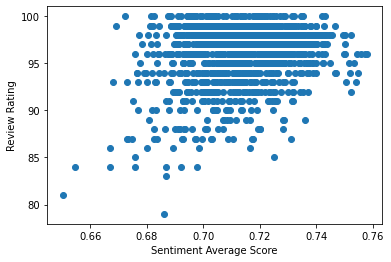

In [59]:
plt.scatter(sandiego_df1['Sentiment'], sandiego_df1['review_scores_rating'])
plt.xlabel('Sentiment Average Score')
plt.ylabel('Review Rating')